### Corrélation et p-value

#### Calcul entre la taille de la phrase et le nombre de tokens d'annotations (formes longues et abbréviations)

Coefficient de corrélation de Pearson entre la taille de la phrase et le nombre de labels spécifiques: 0.46865718075030266
p-value associée à la corrélation: 7.075486952222668e-111


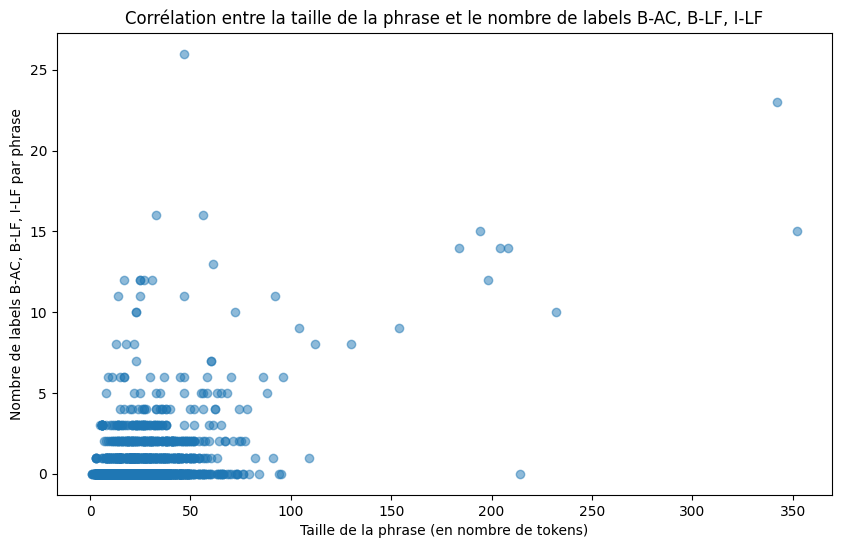

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv('../data/corpus.csv')

def count_specific_labels(labels):
    label_list = eval(labels)
    specific_labels = ['B-AC', 'B-LF', 'I-LF']
    return sum(1 for label in label_list if label in specific_labels)

df['nombre_labels_specifiques'] = df['ner_tags'].apply(count_specific_labels)

df['taille_phrase'] = df['tokens'].apply(lambda x: len(eval(x)))

correlation, p_value = pearsonr(df['taille_phrase'], df['nombre_labels_specifiques'])

print("Coefficient de corrélation de Pearson entre la taille de la phrase et le nombre de labels spécifiques:", correlation)
print("p-value associée à la corrélation:", p_value)

plt.figure(figsize=(10, 6))
plt.scatter(df['taille_phrase'], df['nombre_labels_specifiques'], alpha=0.5)
plt.title('Corrélation entre la taille de la phrase et le nombre de labels B-AC, B-LF, I-LF')
plt.xlabel('Taille de la phrase (en nombre de tokens)')
plt.ylabel('Nombre de labels B-AC, B-LF, I-LF par phrase')
plt.show()


#### Calcul entre la taille de la phrase et le nombre de POS NOUN par phrase

Coefficient de corrélation de Pearson entre le nombre de NOUN par phrase et la taille de la phrase: 0.6662560583362803
p-value associée à la corrélation: 1.4438239516504553e-259


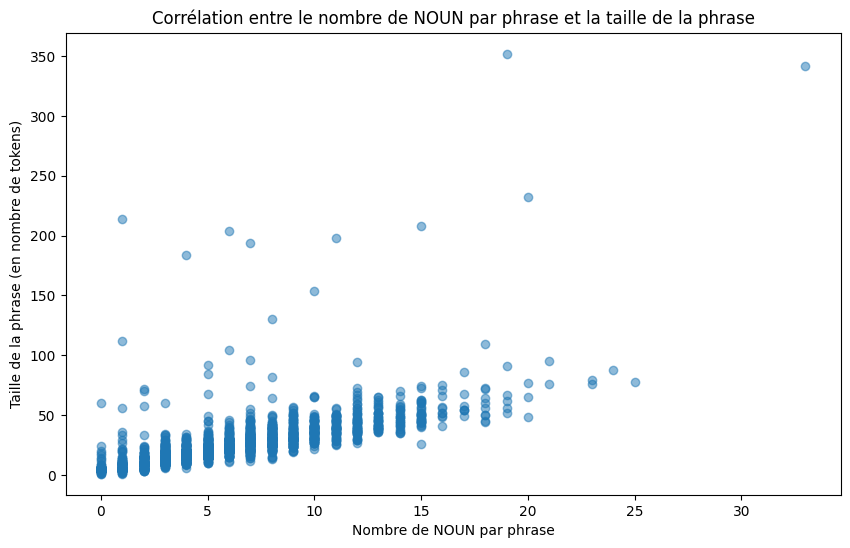

In [4]:
def count_noun(tags):
    return sum(1 for tag in eval(tags) if tag == 'NOUN')

df['nombre_noun_par_phrase'] = df['pos_tags'].apply(count_noun)

df['taille_phrase'] = df['tokens'].apply(lambda x: len(eval(x)))

correlation, p_value = pearsonr(df['nombre_noun_par_phrase'], df['taille_phrase'])

print("Coefficient de corrélation de Pearson entre le nombre de NOUN par phrase et la taille de la phrase :", correlation)
print("p-value associée à la corrélation :", p_value)

# Tracer le graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(df['nombre_noun_par_phrase'], df['taille_phrase'], alpha=0.5)
plt.title('Corrélation entre le nombre de NOUN par phrase et la taille de la phrase')
plt.xlabel('Nombre de NOUN par phrase')
plt.ylabel('Taille de la phrase (en nombre de tokens)')
plt.show()
